In [1]:
#확률적... 뭐요?

In [81]:
import pandas as pd

fish = pd.read_csv('data/Fish.csv')
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [82]:
fish_input = fish[['Weight', 'Length3', 'Length2', 'Height', 'Width']]
fish_target = fish[['Species']]

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [85]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [86]:
from sklearn.linear_model import SGDClassifier

In [87]:
sc = SGDClassifier(loss = 'log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

C:\Users\2-13\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\2-13\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

In [88]:
sc.score(train_scaled, train_target)

0.8235294117647058

In [89]:
sc.score(test_scaled, test_target)

0.775

In [90]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8403361344537815
0.875


C:\Users\2-13\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [91]:
import numpy as np

In [92]:
#확률적 경사 하강법
sc = SGDClassifier(loss='log_loss', random_state=42)

In [93]:
train_score = []
test_score = []

classes = np.unique(train_target)

In [94]:
for _ in range(300): #300번 반복...
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target)) #append가 뭐였지.... 붙여벌여ㅂ
    test_score.append(sc.score(test_scaled, test_target))

C:\Users\2-13\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\2-13\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\2-13\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\2-13\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

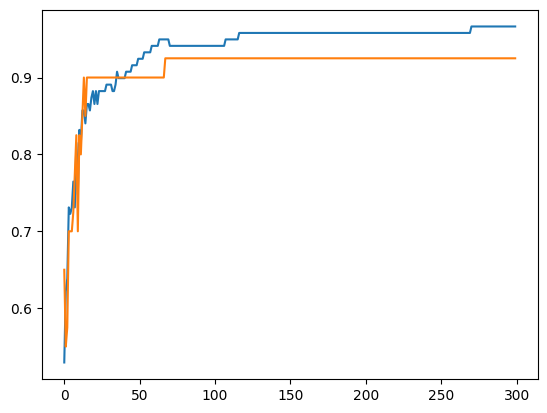

In [95]:
import matplotlib.pyplot as plt

plt.plot(train_score) #파랑
plt.plot(test_score) #노랑
plt.show()